In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Regression Analysis

In [2]:
# loading dataset

lap = pd.read_csv('Laptop_price.csv')

In [3]:
#shape

lap.shape

(1000, 7)

In [4]:
pd.options.display.float_format = "{:.4f}".format

In [5]:
#top 5 records
lap.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.8303,16,512,11.1851,2.6411,17395.0931
1,Acer,2.9128,4,1000,11.3114,3.2600,31607.6059
2,Lenovo,3.2416,4,256,11.8530,2.0291,9291.0235
3,Acer,3.8062,16,512,12.2804,4.5739,17436.7283
4,Acer,3.2681,32,1000,14.9909,4.1935,32917.9907


In [6]:
#last 5 records
lap.tail()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
995,HP,3.3436,4,1000,12.5871,3.1624,31593.6680
996,Dell,2.7806,8,256,12.6794,3.7503,9149.5218
997,Dell,3.2006,4,512,12.6663,3.3926,16552.4048
998,Asus,1.6042,8,256,11.2156,3.8576,9407.4735
999,Lenovo,1.7120,4,256,16.5615,3.4409,8807.6967


In [7]:
# info about the dataset

lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [8]:
lap.dtypes.sort_values()

RAM_Size              int64
Storage_Capacity      int64
Processor_Speed     float64
Screen_Size         float64
Weight              float64
Price               float64
Brand                object
dtype: object

In [9]:
# according to dataset description 'RAM_Size' and  'Storage_Capacity' columns are categorical

lap['RAM_Size'] = lap['RAM_Size'].astype('object')
lap['Storage_Capacity'] = lap['Storage_Capacity'].astype('object')

In [10]:
lap.dtypes.sort_values()

Processor_Speed     float64
Screen_Size         float64
Weight              float64
Price               float64
Brand                object
RAM_Size             object
Storage_Capacity     object
dtype: object

In [11]:
# checking missing values

lap.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [12]:
# checking duplicates and treating them

lap.duplicated().sum()

0

In [13]:
lap.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [14]:
# copying the dataset

lap_original = lap.copy()

In [15]:
# converting numerical column weight to categorical (binary) bivariate analysis ( weight <= 3.5 and weight > 3.5)

lap.Weight = lap.Weight.apply(lambda x: '<= 3.5' if x <= 3.5 else '> 3.5')



In [16]:
# Changing ramsize values by adding measurement at the end

lap.RAM_Size = lap.RAM_Size.map({4:'4 GB', 8:'8 GB', 32:'32 GB', 16:'16 GB'})

In [17]:
# Changing storage capacity values by adding measurement at the end

lap.Storage_Capacity = lap.Storage_Capacity.map({256:'256 GB', 1000:'1 TB', 512:'512 GB'})

In [18]:
lap.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.8303,16 GB,512 GB,11.1851,<= 3.5,17395.0931
1,Acer,2.9128,4 GB,1 TB,11.3114,<= 3.5,31607.6059
2,Lenovo,3.2416,4 GB,256 GB,11.8530,<= 3.5,9291.0235
3,Acer,3.8062,16 GB,512 GB,12.2804,> 3.5,17436.7283
4,Acer,3.2681,32 GB,1 TB,14.9909,> 3.5,32917.9907


#### 6) univariate analysis

In [19]:
# numerical data (all)

In [20]:
lap.dtypes.unique()

# only two datatypes

array([dtype('O'), dtype('float64')], dtype=object)

In [21]:
# numerical undestanding

lap.select_dtypes(include = 'float64').describe().T

,count,mean,std,min,25%,50%,75%,max
Processor_Speed,1000.0000,2.7506,0.7318,1.5116,2.0892,2.7609,3.3626,3.9985
Screen_Size,1000.0000,14.0568,1.7059,11.0121,12.6355,14.0996,15.5286,16.9857
Price,1000.0000,19604.1880,9406.0649,8570.0130,10114.0129,17287.2419,31566.2148,33503.9350


In [22]:
lap.select_dtypes(include = 'float64').columns

Index(['Processor_Speed', 'Screen_Size', 'Price'], dtype='object')

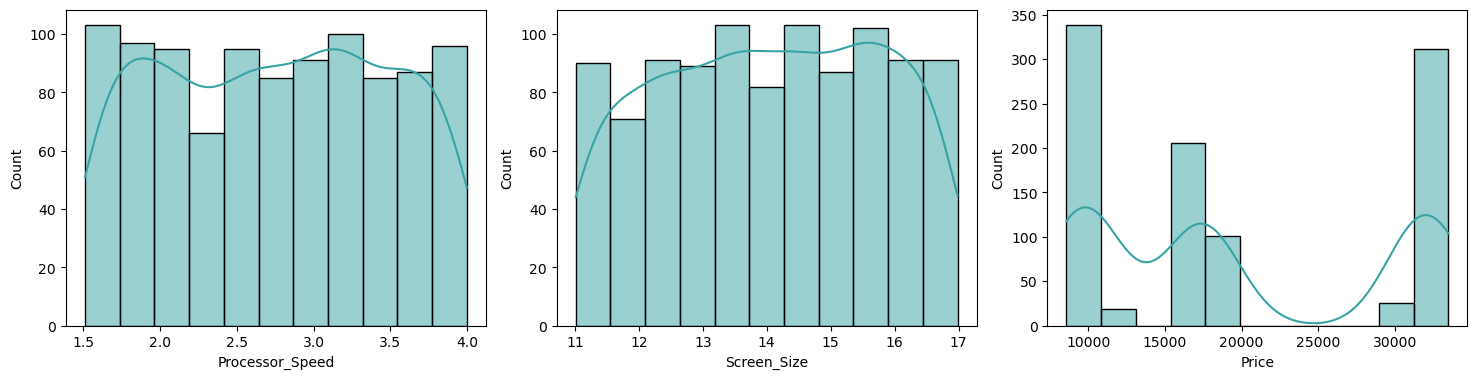

In [23]:
# visual undestanding

fig, axes = plt.subplots(1,3,figsize=(15,4))
axes = axes.flatten()
plt.tight_layout(pad=2)

for index, col in enumerate(list(lap.select_dtypes(include = 'float64').columns)):
    sns.histplot(lap,x=col, ax=axes[index],kde=True, color='#38a3a5')
    

In [24]:
lap.select_dtypes(include = 'float64').columns

Index(['Processor_Speed', 'Screen_Size', 'Price'], dtype='object')

In [25]:
# numerical data (one-by-one)

In [26]:
lap.Processor_Speed.describe()

count   1000.0000
mean       2.7506
std        0.7318
min        1.5116
25%        2.0892
50%        2.7609
75%        3.3626
max        3.9985
Name: Processor_Speed, dtype: float64

In [27]:
lap.Processor_Speed.quantile([0,0.01,0.50,0.70,0.90,0.95,0.99,1])

0.0000   1.5116
0.0100   1.5325
0.5000   2.7609
0.7000   3.2377
0.9000   3.7456
0.9500   3.8800
0.9900   3.9804
1.0000   3.9985
Name: Processor_Speed, dtype: float64

In [28]:
# data has no extream lower or upper values each qaurtile values confirms that

Text(0.5, 1.0, 'Boxplot of Processor_Speed')

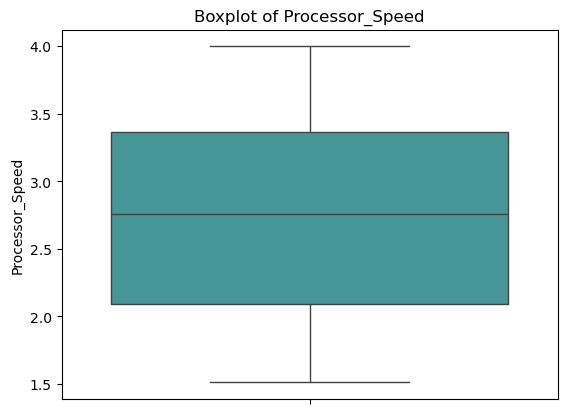

In [29]:
sns.boxplot(lap.Processor_Speed, color='#38a3a5')
plt.title('Boxplot of Processor_Speed')

In [30]:
# no 1D outliers found by boxplot for Processor_Speed

In [31]:
lap.Processor_Speed.agg(['kurt', 'skew'])

kurt   -1.2195
skew   -0.0156
Name: Processor_Speed, dtype: float64

In [32]:
# flatter peak and slightly negativly skewed

In [33]:
lap.Screen_Size.describe()

count   1000.0000
mean      14.0568
std        1.7059
min       11.0121
25%       12.6355
50%       14.0996
75%       15.5286
max       16.9857
Name: Screen_Size, dtype: float64

In [34]:
lap.Screen_Size.quantile([0,0.01,0.50,0.70,0.90,0.95,0.99,1])

0.0000   11.0121
0.0100   11.0687
0.5000   14.0996
0.7000   15.2433
0.9000   16.3868
0.9500   16.6426
0.9900   16.9204
1.0000   16.9857
Name: Screen_Size, dtype: float64

In [35]:
# data has no extream lower or upper values each qaurtile values confirms that. variation around the mean also a small value.

Text(0.5, 1.0, 'Boxplot of Screen_Size')

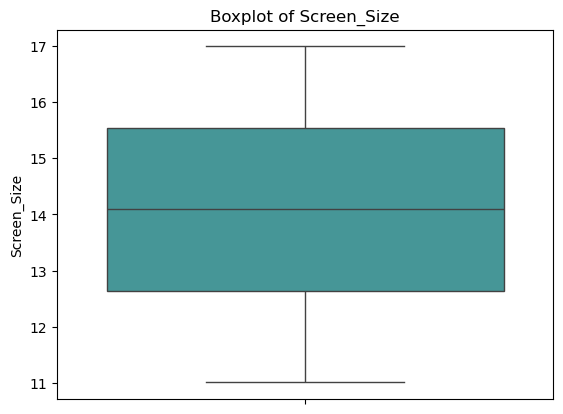

In [36]:
sns.boxplot(lap.Screen_Size,color='#38a3a5')
plt.title('Boxplot of Screen_Size')

In [37]:
# no 1D outliers found by boxplot for Screen_Size

In [38]:
lap.Screen_Size.agg(['kurt', 'skew'])

kurt   -1.1600
skew   -0.0663
Name: Screen_Size, dtype: float64

In [39]:
# flatter peak and slightly negativly skewed

In [40]:
lap.Price.describe()

count    1000.0000
mean    19604.1880
std      9406.0649
min      8570.0130
25%     10114.0129
50%     17287.2419
75%     31566.2148
max     33503.9350
Name: Price, dtype: float64

In [41]:
lap.Price.quantile([0,0.01,0.50,0.70,0.90,0.95,0.99,1])

0.0000    8570.0130
0.0100    8946.5632
0.5000   17287.2419
0.7000   31360.5879
0.9000   32419.1638
0.9500   32818.3928
0.9900   33229.7708
1.0000   33503.9350
Name: Price, dtype: float64

In [42]:
# data has no extream lower or upper values each qaurtile values confirms that. variation around the mean also a small value.

Text(0.5, 1.0, 'Boxplot of Price')

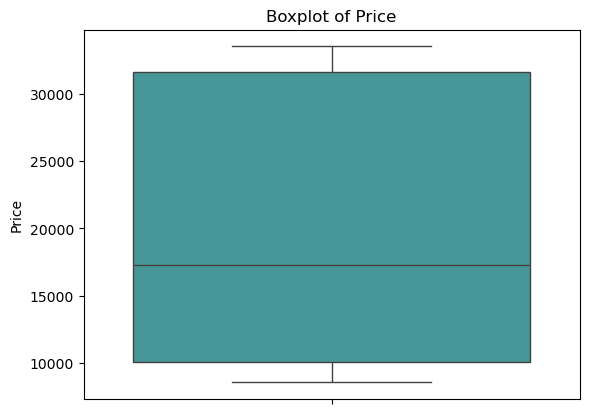

In [43]:
sns.boxplot(lap.Price, color='#38a3a5')
plt.title('Boxplot of Price')

In [44]:
# no 1D outliears found by boxplot for Price but body of boxplot much larger compared to others ( 1st quartile to 3rd quartile)

In [45]:
lap.Price.agg(['kurt', 'skew'])

kurt   -1.5169
skew    0.3663
Name: Price, dtype: float64

In [46]:
# flatter peak and slightly postively skewed

In [47]:
# categorical data (all)

In [48]:
lap.select_dtypes(include = 'O').describe().T

,count,unique,top,freq
Brand,1000,5,Dell,210
RAM_Size,1000,4,32 GB,274
Storage_Capacity,1000,3,256 GB,357
Weight,1000,2,<= 3.5,510


In [49]:
lap.select_dtypes(include = 'O').columns

Index(['Brand', 'RAM_Size', 'Storage_Capacity', 'Weight'], dtype='object')

In [50]:
import researchpy as rp

rp.summary_cat(lap.select_dtypes(include = 'O'))

,Variable,Outcome,Count,Percent
0,Brand,Dell,210,21.0000
1,,Asus,206,20.6000
2,,Acer,204,20.4000
3,,Lenovo,190,19.0000
4,,HP,190,19.0000
5,RAM_Size,32 GB,274,27.4000
6,,8 GB,246,24.6000
7,,4 GB,243,24.3000
8,,16 GB,237,23.7000
9,Storage_Capacity,256 GB,357,35.7000


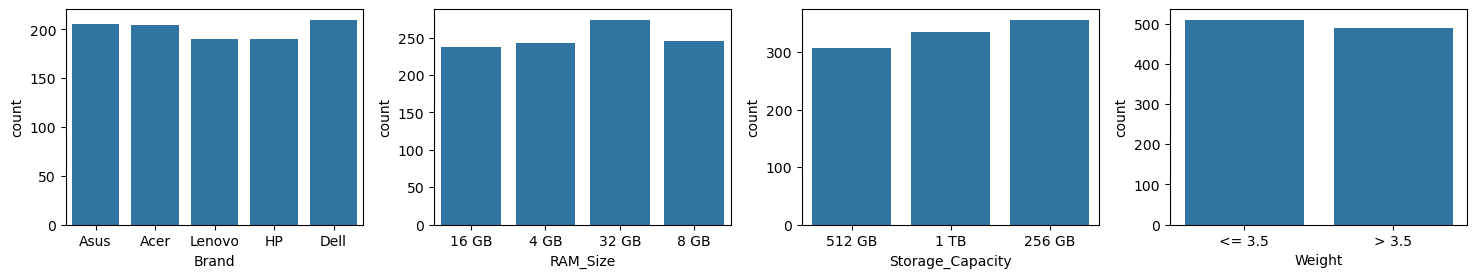

In [51]:
# visual undestanding

fig, axes = plt.subplots(1,4,figsize=(15,3))
axes = axes.flatten()
plt.tight_layout(pad=2)

for index, col in enumerate(list(lap.select_dtypes(include = 'O').columns)):
    sns.countplot(lap,x=col, ax=axes[index])
    

In [52]:
# more info about numerical data
rp.summary_cont(lap.select_dtypes(include = 'float64'))

C:\Users\User\anaconda3\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Processor_Speed' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
C:\Users\User\anaconda3\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Screen_Size' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
C:\Users\User\anaconda3\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Price' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Processor_Speed,1000.0000,2.7506,0.7318,0.0231,2.7052,2.7960
1,Screen_Size,1000.0000,14.0568,1.7059,0.0539,13.9509,14.1626
2,Price,1000.0000,19604.1880,9406.0649,297.4459,19020.4976,20187.8784


In [53]:
# categorical data ( one - by - one)

In [54]:
lap.select_dtypes(include = 'O').columns

Index(['Brand', 'RAM_Size', 'Storage_Capacity', 'Weight'], dtype='object')

In [55]:
lap.Brand.value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [56]:
lap.Brand.value_counts(normalize=True)

Brand
Dell     0.2100
Asus     0.2060
Acer     0.2040
Lenovo   0.1900
HP       0.1900
Name: proportion, dtype: float64

In [57]:
# all categorize approximelty have same percentage

In [58]:
# visual

Text(0.5, 1.0, 'Bar chart of Brands')

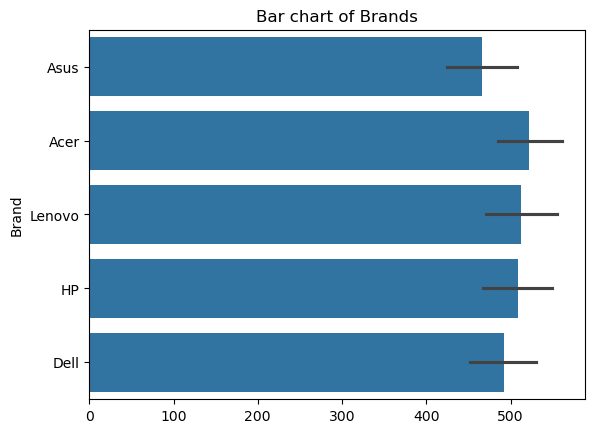

In [59]:
sns.barplot(lap.Brand)
plt.title('Bar chart of Brands')

In [60]:
lap.RAM_Size.value_counts()

RAM_Size
32 GB    274
8 GB     246
4 GB     243
16 GB    237
Name: count, dtype: int64

In [61]:
lap.RAM_Size.value_counts(normalize=True)

RAM_Size
32 GB   0.2740
8 GB    0.2460
4 GB    0.2430
16 GB   0.2370
Name: proportion, dtype: float64

In [62]:
# all categorize approximelty have same percentage

In [63]:
# visual

Text(0.5, 1.0, 'Bar chart of RAM_Size')

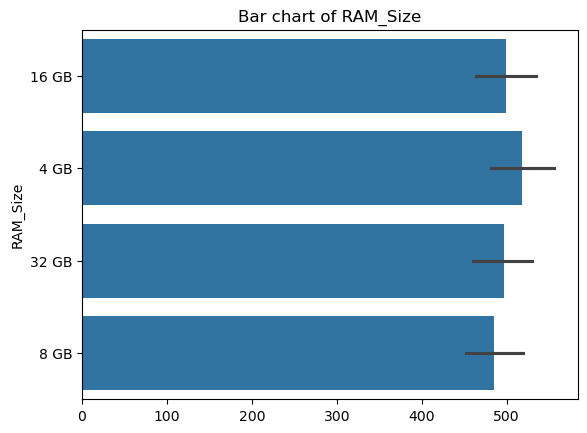

In [64]:
sns.barplot(lap.RAM_Size)
plt.title('Bar chart of RAM_Size')

In [65]:
lap.Storage_Capacity.value_counts()

Storage_Capacity
256 GB    357
1 TB      336
512 GB    307
Name: count, dtype: int64

In [66]:
lap.Storage_Capacity.value_counts(normalize=True)

Storage_Capacity
256 GB   0.3570
1 TB     0.3360
512 GB   0.3070
Name: proportion, dtype: float64

In [67]:
# all categorize approximelty have same percentage

In [68]:
# visual

Text(0.5, 1.0, 'Bar chart of Storage_Capacity')

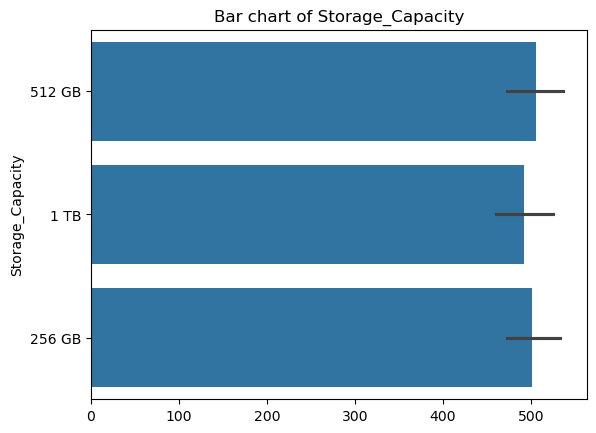

In [69]:
sns.barplot(lap.Storage_Capacity)
plt.title('Bar chart of Storage_Capacity')

In [70]:
lap.Weight.value_counts()

Weight
<= 3.5    510
> 3.5     490
Name: count, dtype: int64

In [71]:
lap.Weight.value_counts(normalize=True)

Weight
<= 3.5   0.5100
> 3.5    0.4900
Name: proportion, dtype: float64

In [72]:
# all categorize approximelty have same percentage

In [73]:
# visual

Text(0.5, 1.0, 'Pie chart of Weight')

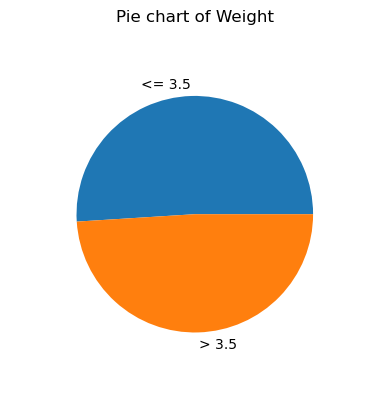

In [74]:
plt.pie(x = lap.Weight.value_counts(), labels=['<= 3.5', '> 3.5'],radius=0.8)
plt.title('Pie chart of Weight')

#### 8) Bi-variate analysis

In [75]:
# correaltion
lap.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Processor_Speed'>

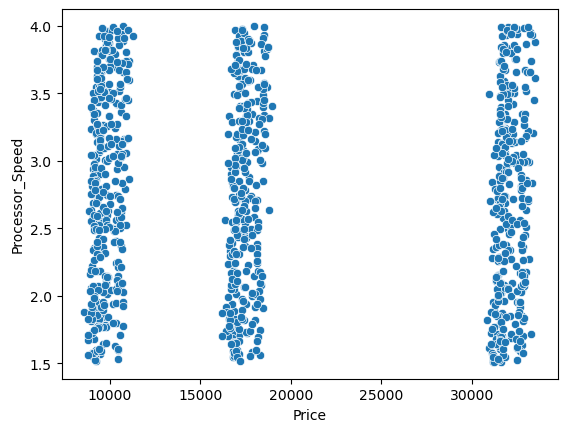

In [76]:
# 'Price' and 'Processor speed'

# first check the scatter plot

sns.scatterplot(data = lap, x = 'Price', y = 'Processor_Speed')


In [77]:
# checking correlation between 'Price' and 'Processor speed'

lap.Price.corr(lap.Processor_Speed)

# I can say there is no correaltion since r value is very low

-0.05073733179930878

<Axes: >

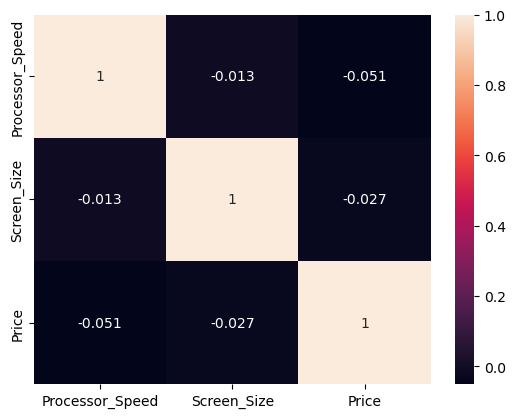

In [78]:
# correaltion
# coorelation matrix between numerical data

sns.heatmap(lap.corr(numeric_only=True), annot=True)

In [79]:
#chi_square test

<Axes: xlabel='Storage_Capacity'>

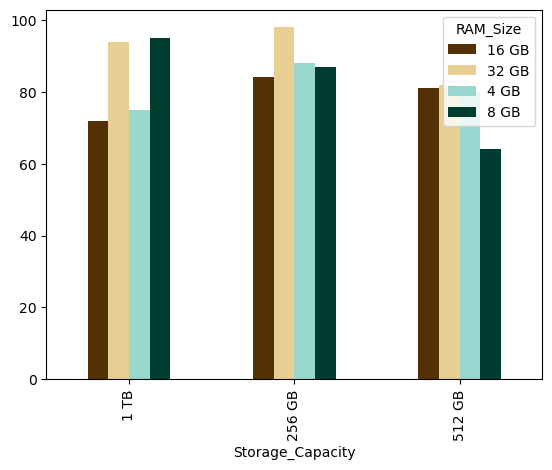

In [80]:
# grouped bar plot for Storage and Ram
pd.crosstab(lap.Storage_Capacity, lap.RAM_Size).plot(kind='bar',colormap='BrBG')

In [81]:
pd.crosstab(lap.Storage_Capacity, lap.RAM_Size, margins=True)

RAM_Size,16 GB,32 GB,4 GB,8 GB,All
Storage_Capacity,,,,,
1 TB,72,94,75,95,336
256 GB,84,98,88,87,357
512 GB,81,82,80,64,307
All,237,274,243,246,1000


In [82]:
(pd.crosstab(lap.Storage_Capacity, lap.RAM_Size, margins=True)<5).sum()

# all cell frequencies are greater than 5
# total obs greater than 50
# variables are mutually exclusinve

# so i can perform Chi_square test for independency


RAM_Size
16 GB    0
32 GB    0
4 GB     0
8 GB     0
All      0
dtype: int64

In [83]:
from scipy.stats import chi2_contingency

In [84]:
stat, pval, dof, expfreq = chi2_contingency(pd.crosstab(lap.Storage_Capacity, lap.RAM_Size))

In [85]:
pval

# since p value greater than 0.05 there is no enogh evindence to reject null hypothesis, 
# it confirms that there is no association between Storage and Ram

0.38803176653859894

In [86]:
expfreq

array([[79.632, 92.064, 81.648, 82.656],
       [84.609, 97.818, 86.751, 87.822],
       [72.759, 84.118, 74.601, 75.522]])

#### 9) colinearity and multicolinearity

<Axes: >

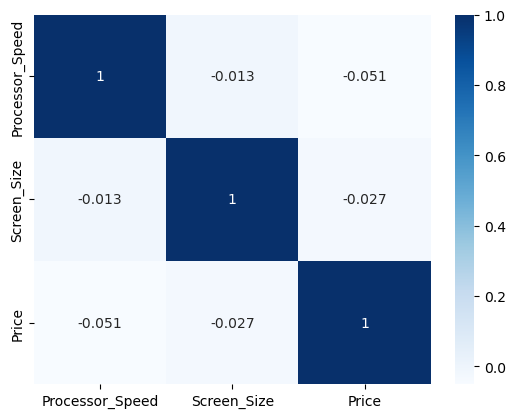

In [87]:
# colinearity

sns.heatmap(lap.corr(numeric_only=True), annot=True, cmap='Blues')

In [88]:
# since no corrleation between any group is very low. nothing to remove

#### 10) Encording data

In [89]:
X = lap.drop(columns=['Price'])
y = lap.Price

X_scaled_raw = pd.get_dummies(X, columns=X.select_dtypes(include=['O']).columns, drop_first=True)

In [90]:
X_scaled_raw.shape, y.shape

((1000, 12), (1000,))

#### 7) Outlier detection and removal

In [91]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
label = lof.fit_predict(X_scaled_raw)


In [92]:
np.unique(label)

array([1])

In [93]:
# no outliears according to lof default model

#### 11) Train test split


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_scaled_raw, y,test_size=0.3, random_state=0)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 12), (300, 12), (700,), (300,))

#### 12) Scaling

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
X_train

,Processor_Speed,Screen_Size,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,RAM_Size_32 GB,RAM_Size_4 GB,RAM_Size_8 GB,Storage_Capacity_256 GB,Storage_Capacity_512 GB,Weight_> 3.5
105,1.5663,11.5526,False,False,False,False,False,True,False,False,False,True
68,2.5019,16.8923,True,False,False,False,True,False,False,True,False,False
479,1.7623,16.2105,False,False,False,False,False,True,False,True,False,True
399,3.6788,13.6632,False,False,True,False,False,True,False,False,True,False
434,3.7352,14.0852,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2.3689,15.1982,True,False,False,False,False,False,True,True,False,True
192,2.1160,16.2423,True,False,False,False,False,False,True,False,False,True
629,3.9128,14.0831,True,False,False,False,True,False,False,False,True,False
559,3.6836,15.7365,True,False,False,False,False,False,True,True,False,True


In [98]:
scale = StandardScaler()

X_train_1 = scale.fit_transform(X_train)
X_test_1 = scale.transform(X_test)

X_train_sc = pd.DataFrame(X_train_1, columns=X_train.columns, index = X_train.index)
X_test_sc = pd.DataFrame(X_test_1, columns=X_test.columns, index = X_test.index)

In [99]:
X_train_sc.shape, X_test_sc.shape

((700, 12), (300, 12))

In [100]:
X_train_sc.head()

,Processor_Speed,Screen_Size,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,RAM_Size_32 GB,RAM_Size_4 GB,RAM_Size_8 GB,Storage_Capacity_256 GB,Storage_Capacity_512 GB,Weight_> 3.5
105,-1.6344,-1.4735,-0.5222,-0.5333,-0.4821,-0.4685,-0.6280,1.8151,-0.5752,-0.7361,-0.6703,1.0468
68,-0.3569,1.6715,1.9149,-0.5333,-0.4821,-0.4685,1.5923,-0.5509,-0.5752,1.3585,-0.6703,-0.9553
479,-1.3668,1.2700,-0.5222,-0.5333,-0.4821,-0.4685,-0.6280,1.8151,-0.5752,1.3585,-0.6703,1.0468
399,1.2502,-0.2304,-0.5222,-0.5333,2.0744,-0.4685,-0.6280,1.8151,-0.5752,-0.7361,1.4919,-0.9553
434,1.3272,0.0182,1.9149,-0.5333,-0.4821,-0.4685,-0.6280,1.8151,-0.5752,-0.7361,-0.6703,-0.9553


#### 9) multicolinearity

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = lap.drop(columns=['Price'])
y = lap.Price

def vifval(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    topval = vif.head(1)
    return topval

In [102]:
vifval(X_train_sc)

,Features,VIF
2,Brand_Asus,1.6700


In [103]:
# top vif value is 1.67 so we dont have to remove multicolinerity since the highest value is less than 10

#### 13) PCA

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(n_components=X_train_sc.shape[1])
X_pca_train = pca.fit_transform(X_train_sc)
X_pca_test = pca.transform(X_test_sc)

In [106]:
pca.components_

array([[ 1.46806375e-02,  3.49404874e-02,  1.51956629e-01,
         4.87427158e-02, -1.40445033e-01, -4.53838212e-02,
        -2.25510556e-01,  8.99395442e-02,  1.65251005e-01,
         6.59793515e-01, -6.54070206e-01, -4.38762774e-02],
       [-9.44334605e-02,  2.57381836e-02,  3.50268896e-01,
        -3.24835705e-01,  1.36540227e-01, -1.36298506e-01,
        -5.59395658e-01, -9.20386272e-03,  5.81235746e-01,
        -1.95429472e-01,  1.72609406e-01,  7.85043014e-02],
       [ 6.81615505e-02, -5.19847398e-02, -1.95719600e-01,
         3.98533921e-02,  4.25165762e-01, -2.56700600e-01,
        -3.58803236e-01,  6.71298990e-01, -3.34941838e-01,
         5.77802814e-02,  7.72943131e-02, -7.22143303e-02],
       [-2.77279678e-01,  3.00096855e-01, -4.49239287e-01,
         6.42923391e-01, -1.16244056e-01, -9.77975039e-02,
        -2.27268787e-01, -3.20103961e-02,  2.88685266e-01,
        -7.94953841e-02,  3.66284455e-02,  2.26137775e-01],
       [-3.26502975e-02,  3.87115006e-02, -4.9710228

In [107]:
pca_df_x_train = pd.DataFrame(data=pca.components_, columns=X_train_sc.columns)

In [108]:
pca.explained_variance_ratio_

array([0.12697907, 0.11971971, 0.11693696, 0.10694779, 0.10424823,
       0.09738902, 0.08275977, 0.07958746, 0.07851015, 0.04093173,
       0.02572867, 0.02026144])

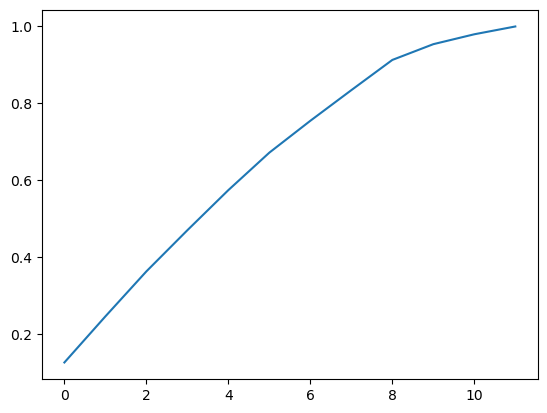

In [109]:
cm_exp_variance = []
s = 0
for i in pca.explained_variance_ratio_:
    s += i
    cm_exp_variance.append(s)

plt.plot(range(X_train_sc.shape[1]), cm_exp_variance)

#### 14) Regression Models

##### Decision Tree Regressor

In [110]:
X_train_sc.head()

,Processor_Speed,Screen_Size,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,RAM_Size_32 GB,RAM_Size_4 GB,RAM_Size_8 GB,Storage_Capacity_256 GB,Storage_Capacity_512 GB,Weight_> 3.5
105,-1.6344,-1.4735,-0.5222,-0.5333,-0.4821,-0.4685,-0.6280,1.8151,-0.5752,-0.7361,-0.6703,1.0468
68,-0.3569,1.6715,1.9149,-0.5333,-0.4821,-0.4685,1.5923,-0.5509,-0.5752,1.3585,-0.6703,-0.9553
479,-1.3668,1.2700,-0.5222,-0.5333,-0.4821,-0.4685,-0.6280,1.8151,-0.5752,1.3585,-0.6703,1.0468
399,1.2502,-0.2304,-0.5222,-0.5333,2.0744,-0.4685,-0.6280,1.8151,-0.5752,-0.7361,1.4919,-0.9553
434,1.3272,0.0182,1.9149,-0.5333,-0.4821,-0.4685,-0.6280,1.8151,-0.5752,-0.7361,-0.6703,-0.9553


In [111]:
y_train.head()

105   31197.8960
68    10566.1710
479    9226.4932
399   17176.3935
434   31588.8872
Name: Price, dtype: float64

In [112]:
from sklearn.tree import DecisionTreeRegressor

ds = DecisionTreeRegressor()
model = ds.fit(X_train_sc, y_train)

In [113]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [114]:
# Default Model
# r2_score

r2_train = r2_score(y_train, model.predict(X_train_sc))
r2_test = r2_score(y_test, model.predict(X_test_sc))

print(f'RSqaured score for train set, {r2_train}')
print(f'RSqaured score for test set, {r2_test}')

print('\n')
# root_mean_squared_error

rmsetrain = root_mean_squared_error(y_train, model.predict(X_train_sc))
rmsetest = root_mean_squared_error(y_test, model.predict(X_test_sc))

print(f'root_mean_squared_error for train set, {rmsetrain}')
print(f'root_mean_squared_error for test set, {rmsetest}')

print('\n')
# adj Rsquared


print(f'adj Rsquared for train set, {1 - ((1 - r2_train)*(X_train_sc.shape[0] - 1)/(X_train_sc.shape[0] - X_train_sc.shape[1] - 1))}')
print(f'adj Rsquared for test set, {1 - ((1 - r2_test)*(X_test_sc.shape[0] - 1)/(X_test_sc.shape[0] - X_test_sc.shape[1] - 1))}')

RSqaured score for train set, 1.0
RSqaured score for test set, 0.9989880130161215


root_mean_squared_error for train set, 0.0
root_mean_squared_error for test set, 297.89511005323453


adj Rsquared for train set, 1.0
adj Rsquared for test set, 0.9989456999714994


In [115]:
# crossvalscore (r2)

from sklearn.model_selection import cross_val_score

csscore = cross_val_score(ds, X_train_sc, y_train,scoring='r2', cv=5).mean()
csscore

0.9990024168884168

In [116]:
# hyper param tuning

# checking different max_depth and min_sample_split

Text(0, 0.5, 'r2 score')

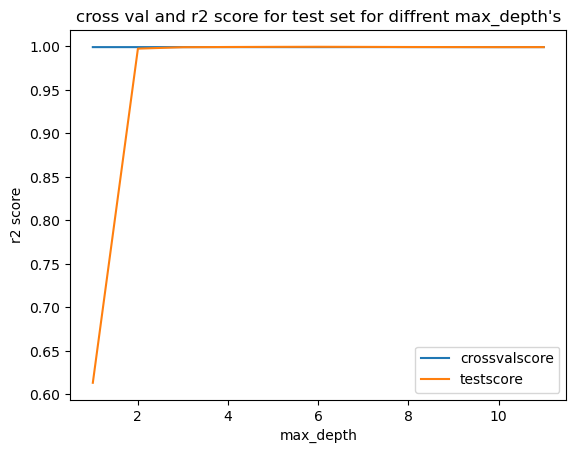

In [117]:
#max_depth

crossvalscore = []
testscore = []

for i in range(1,X_train_sc.shape[1]):
    
    #cross val
    ds1 = DecisionTreeRegressor(max_depth=i)
    csscore = cross_val_score(ds, X_train_sc, y_train,scoring='r2', cv=5).mean()
    crossvalscore.append(csscore)

    #test r2 score
    model1 = ds1.fit(X_train_sc, y_train)
    r2score = r2_score(y_test, model1.predict(X_test_sc))
    testscore.append(r2score)

plt.plot(range(1,X_train_sc.shape[1]), crossvalscore, label='crossvalscore')
plt.plot(range(1,X_train_sc.shape[1]), testscore, label='testscore')
plt.legend()
plt.title("cross val and r2 score for test set for diffrent max_depth's")
plt.xlabel('max_depth')
plt.ylabel('r2 score')


    

In [118]:
# based on the result im gonna choose 2 to 4 for gridsearch

Text(0, 0.5, 'r2 score')

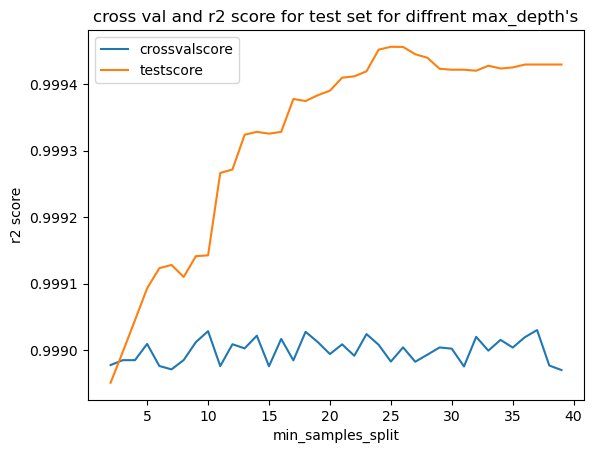

In [119]:
#min_sample_split

crossvalscore = []
testscore = []

for i in range(2,40):
    
    #cross val
    ds1 = DecisionTreeRegressor(min_samples_split=i)
    csscore = cross_val_score(ds, X_train_sc, y_train,scoring='r2', cv=5).mean()
    crossvalscore.append(csscore)

    #test r2 score
    model1 = ds1.fit(X_train_sc, y_train)
    r2score = r2_score(y_test, model1.predict(X_test_sc))
    testscore.append(r2score)

plt.plot(range(2,40), crossvalscore, label='crossvalscore')
plt.plot(range(2,40), testscore, label='testscore')
plt.legend()
plt.title("cross val and r2 score for test set for diffrent max_depth's")
plt.xlabel('min_samples_split')
plt.ylabel('r2 score')

In [120]:
# im gonna choose from 20 to 30 for gridsearch beacause crossval score approximatly in the same range but testscore is highest arounf this area

In [121]:
#DecisionTreeRegressor?

In [122]:
# grid search

from sklearn.model_selection import GridSearchCV

param = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
         'max_depth':[2, 3, 4],
         'min_samples_split':list(range(20,31))}

model = GridSearchCV(DecisionTreeRegressor(),
                     param_grid=param,
                     scoring='r2',
                     n_jobs=-1)
                     
                     

In [123]:
model.fit(X_train_sc, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 3, ...], 'min_samples_split': [20, 21, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


In [124]:
model.best_score_

0.9991358651652922

In [125]:
model.best_params_

{'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_split': 28}

In [126]:
r2trainbm = r2_score(y_train, model.best_estimator_.predict(X_train_sc))
r2testbm = r2_score(y_test, model.best_estimator_.predict(X_test_sc))
rmsetrainbm = root_mean_squared_error(y_train, model.best_estimator_.predict(X_train_sc))
rmsetestbm = root_mean_squared_error(y_test, model.best_estimator_.predict(X_test_sc))

print('new model r2 score train set - ',r2trainbm)
print('new model r2 score test set - ',r2testbm)
print('new model rmse score train set - ',rmsetrainbm)
print('new model rmse score test set - ',rmsetestbm)

new model r2 score train set -  0.999214912168307
new model r2 score test set -  0.9991188359798839
new model rmse score train set -  263.82415583810985
new model rmse score test set -  277.97407185629226


##### SVR

In [127]:
from sklearn.svm import SVR

svr = SVR()
model = svr.fit(X_train_sc, y_train)

In [128]:
# r2_score

r2_train = r2_score(y_train, model.predict(X_train_sc))
r2_test = r2_score(y_test, model.predict(X_test_sc))

print(f'RSqaured score for train set, {r2_train}')
print(f'RSqaured score for test set, {r2_test}')

print('\n')
# root_mean_squared_error

rmsetrain = root_mean_squared_error(y_train, model.predict(X_train_sc))
rmsetest = root_mean_squared_error(y_test, model.predict(X_test_sc))

print(f'root_mean_squared_error for train set, {rmsetrain}')
print(f'root_mean_squared_error for test set, {rmsetest}')

print('\n')
# adj Rsquared


print(f'adj Rsquared for train set, {1 - ((1 - r2_train)*(X_train_sc.shape[0] - 1)/(X_train_sc.shape[0] - X_train_sc.shape[1] - 1))}')
print(f'adj Rsquared for test set, {1 - ((1 - r2_test)*(X_test_sc.shape[0] - 1)/(X_test_sc.shape[0] - X_test_sc.shape[1] - 1))}')

RSqaured score for train set, -0.06061152905219824
RSqaured score for test set, -0.04651968405710871


root_mean_squared_error for train set, 9696.915384318374
root_mean_squared_error for test set, 9579.649330105225


adj Rsquared for train set, -0.0791374946251624
adj Rsquared for test set, -0.09027660464486242


In [129]:
# as far as data shows SVR might not be the best model for this

In [130]:
#SVR?

In [131]:
# crossvalscore

from sklearn.model_selection import cross_val_score

csscore = cross_val_score(svr, X_train_sc, y_train,scoring='r2', cv=5).mean()
csscore

-0.06968017194869938

In [132]:
# hyper param tuning

# checking different tol,C, kernel

In [133]:
# grid search

from sklearn.model_selection import GridSearchCV

param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
         'tol':[1e-5, 1e-4, 1e-3, 1e-2],
         'C':[0.1, 1, 10, 100, 1000]}

model1 = GridSearchCV(SVR(),
                     param_grid=param,
                     scoring = 'r2',
                     n_jobs=-1)
                     

In [134]:
model1.fit(X_train_sc, y_train)

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ['linear', 'poly', ...], 'tol': [1e-05, 0.0001, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [135]:
model1.best_params_

{'C': 1000, 'kernel': 'linear', 'tol': 0.0001}

In [136]:
model1.best_score_

0.9995493609868695

In [137]:
newmodel = model1.best_estimator_

In [138]:
# first our r2 scores were very low but after grid search i got high r2 score for svr model

In [139]:
r2trainbm = r2_score(y_train, newmodel.predict(X_train_sc))
r2testbm = r2_score(y_test, newmodel.predict(X_test_sc))
rmsetrainbm = root_mean_squared_error(y_train, newmodel.predict(X_train_sc))
rmsetestbm = root_mean_squared_error(y_test, newmodel.predict(X_test_sc))

print('new model r2 score train set - ',r2trainbm)
print('new model r2 score test set - ',r2testbm)
print('new model rmse score train set - ',rmsetrainbm)
print('new model rmse score test set - ',rmsetestbm)

new model r2 score train set -  0.999574277638638
new model r2 score test set -  0.9995188918773559
new model rmse score train set -  194.27578180124533
new model rmse score test set -  205.39849429937274


##### XGBoost

In [140]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
model = xgb.fit(X_train_sc, y_train)

In [141]:
# r2_score

r2_train = r2_score(y_train, model.predict(X_train_sc))
r2_test = r2_score(y_test, model.predict(X_test_sc))

print(f'RSqaured score for train set, {r2_train}')
print(f'RSqaured score for test set, {r2_test}')

print('\n')
# root_mean_squared_error

rmsetrain = root_mean_squared_error(y_train, model.predict(X_train_sc))
rmsetest = root_mean_squared_error(y_test, model.predict(X_test_sc))

print(f'root_mean_squared_error for train set, {rmsetrain}')
print(f'root_mean_squared_error for test set, {rmsetest}')

print('\n')
# adj Rsquared


print(f'adj Rsquared for train set, {1 - ((1 - r2_train)*(X_train_sc.shape[0] - 1)/(X_train_sc.shape[0] - X_train_sc.shape[1] - 1))}')
print(f'adj Rsquared for test set, {1 - ((1 - r2_test)*(X_test_sc.shape[0] - 1)/(X_test_sc.shape[0] - X_test_sc.shape[1] - 1))}')

RSqaured score for train set, 0.9999932786887832
RSqaured score for test set, 0.9993540670778116


root_mean_squared_error for train set, 24.41082383802533
root_mean_squared_error for test set, 237.99597987597883


adj Rsquared for train set, 0.9999931612859672
adj Rsquared for test set, 0.9993270594294971


In [142]:
# crossvalscore

from sklearn.model_selection import cross_val_score

csscore = cross_val_score(xgb, X_train_sc, y_train,scoring='r2', cv=5).mean()
csscore

0.9993393985421323

In [143]:
# difference between train and test r2scores are very low, so i can say no overfitting detected. but rmse for test set 10X higher than train set



In [144]:
#xgb?

In [145]:
# hyper param tuning

# checking different max_depth, learning_rate and n_estimators

Text(0, 0.5, 'r2 score')

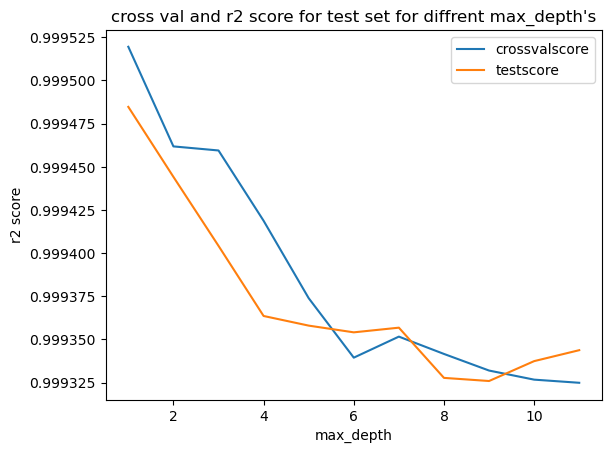

In [146]:
#max_depth

crossvalscore = []
testscore = []

for i in range(1,X_train_sc.shape[1]):
    
    #cross val
    xgb1 = XGBRegressor(max_depth=i)
    csscore = cross_val_score(xgb1, X_train_sc, y_train,scoring='r2', cv=5).mean()
    crossvalscore.append(csscore)

    #test r2 score
    model1 = xgb1.fit(X_train_sc, y_train)
    r2score = r2_score(y_test, model1.predict(X_test_sc))
    testscore.append(r2score)

plt.plot(range(1,X_train_sc.shape[1]), crossvalscore, label='crossvalscore')
plt.plot(range(1,X_train_sc.shape[1]), testscore, label='testscore')
plt.legend()
plt.title("cross val and r2 score for test set for diffrent max_depth's")
plt.xlabel('max_depth')
plt.ylabel('r2 score')


    

In [147]:
# im gonna go with max depth from 2 to 4 for gdrisearch after 2 maxdepth both train and test scores are dropping.


Text(0, 0.5, 'r2 score')

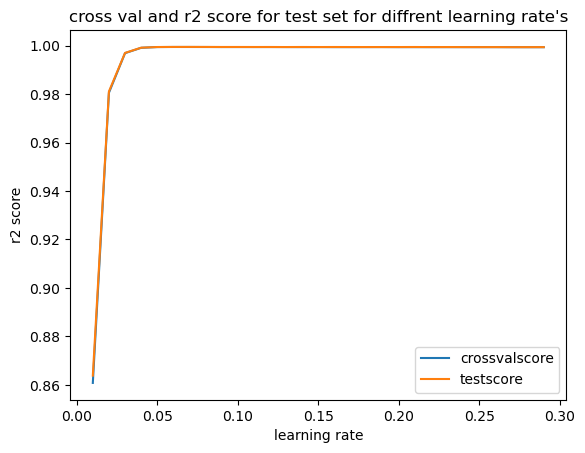

In [148]:
#learning rate

crossvalscore = []
testscore = []

for i in list(np.arange(0.01, 0.3, 0.01)):
    
    #cross val
    xgb1 = XGBRegressor(learning_rate=i)
    csscore = cross_val_score(xgb1, X_train_sc, y_train,scoring='r2', cv=5).mean()
    crossvalscore.append(csscore)

    #test r2 score
    model1 = xgb1.fit(X_train_sc, y_train)
    r2score = r2_score(y_test, model1.predict(X_test_sc))
    testscore.append(r2score)

plt.plot(list(np.arange(0.01, 0.3, 0.01)), crossvalscore, label='crossvalscore')
plt.plot(list(np.arange(0.01, 0.3, 0.01)), testscore, label='testscore')
plt.legend()
plt.title("cross val and r2 score for test set for diffrent learning rate's")
plt.xlabel('learning rate')
plt.ylabel('r2 score')


    

In [149]:
# both lines behave same pattern, im gonna go with values from 0.01 to 0.05 after around 0.025 i can see r2 score not changing

Text(0, 0.5, 'r2 score')

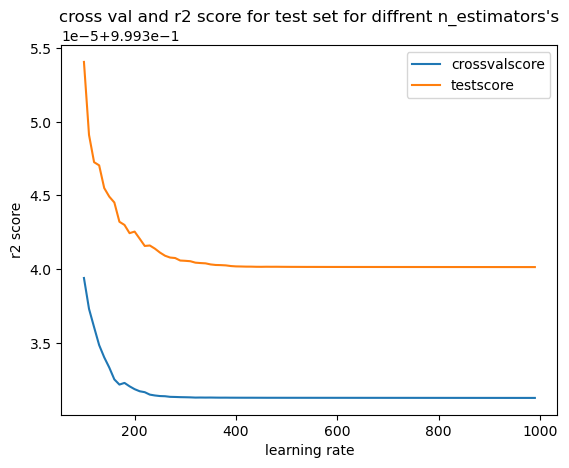

In [150]:
#n_estimators

crossvalscore = []
testscore = []

for i in range(100, 1000, 10):
    
    #cross val
    xgb1 = XGBRegressor(n_estimators=i, n_jobs=-1)
    csscore = cross_val_score(xgb1, X_train_sc, y_train,scoring='r2', cv=5).mean()
    crossvalscore.append(csscore)

    #test r2 score
    model1 = xgb1.fit(X_train_sc, y_train)
    r2score = r2_score(y_test, model1.predict(X_test_sc))
    testscore.append(r2score)

plt.plot(range(100, 1000, 10), crossvalscore, label='crossvalscore')
plt.plot(range(100, 1000, 10), testscore, label='testscore')
plt.legend()
plt.title("cross val and r2 score for test set for diffrent n_estimators's")
plt.xlabel('learning rate')
plt.ylabel('r2 score')


    

Text(0, 0.5, 'r2 score')

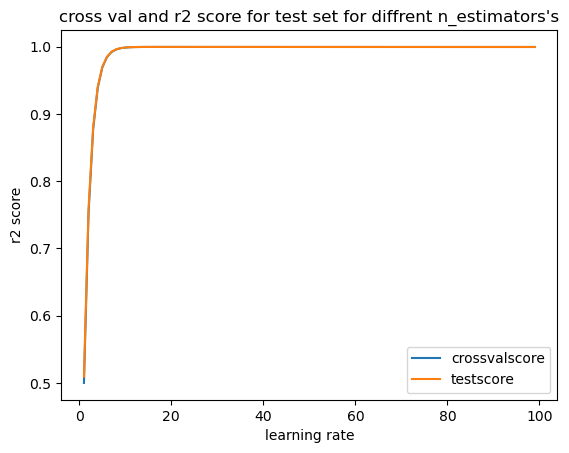

In [151]:
#n_estimators

crossvalscore = []
testscore = []

for i in range(1, 100):
    
    #cross val
    xgb1 = XGBRegressor(n_estimators=i, n_jobs=-1)
    csscore = cross_val_score(xgb1, X_train_sc, y_train,scoring='r2', cv=5).mean()
    crossvalscore.append(csscore)

    #test r2 score
    model1 = xgb1.fit(X_train_sc, y_train)
    r2score = r2_score(y_test, model1.predict(X_test_sc))
    testscore.append(r2score)

plt.plot(range(1, 100), crossvalscore, label='crossvalscore')
plt.plot(range(1, 100), testscore, label='testscore')
plt.legend()
plt.title("cross val and r2 score for test set for diffrent n_estimators's")
plt.xlabel('learning rate')
plt.ylabel('r2 score')

Text(0, 0.5, 'r2 score')

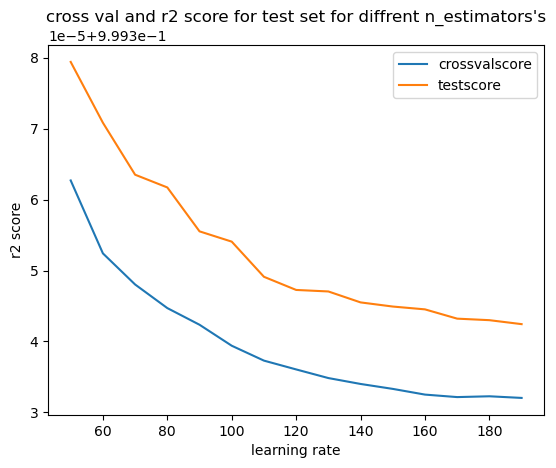

In [152]:
#n_estimators

crossvalscore = []
testscore = []

for i in range(50, 200, 10):
    
    #cross val
    xgb1 = XGBRegressor(n_estimators=i, n_jobs=-1)
    csscore = cross_val_score(xgb1, X_train_sc, y_train,scoring='r2', cv=5).mean()
    crossvalscore.append(csscore)

    #test r2 score
    model1 = xgb1.fit(X_train_sc, y_train)
    r2score = r2_score(y_test, model1.predict(X_test_sc))
    testscore.append(r2score)

plt.plot(range(50, 200, 10), crossvalscore, label='crossvalscore')
plt.plot(range(50, 200, 10), testscore, label='testscore')
plt.legend()
plt.title("cross val and r2 score for test set for diffrent n_estimators's")
plt.xlabel('learning rate')
plt.ylabel('r2 score')

In [153]:
# based on all the chart i choose range 5 to 15 for n_estimators becasue middle chart shows after around 15 the line looks horizontal

In [154]:
# gridsearch

# grid search

from sklearn.model_selection import GridSearchCV

param = {'max_depth':[1, 2, 3, 4],
         'n_estimators':list(range(5, 16)),
         'learning_rate':list(np.arange(0.01, 0.05, 0.01))}

model1 = GridSearchCV(XGBRegressor(),
                     param_grid=param,
                     scoring = 'r2',
                     n_jobs=-1)

In [155]:
model1.fit(X_train_sc, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.02, ...], 'max_depth': [1, 2, ...], 'n_estimators': [5, 6, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [156]:
model1.best_params_

{'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 15}

In [157]:
model1.best_score_

0.698336225353134

In [158]:
newmodel2 = model1.best_estimator_

In [159]:
xgbr2test = r2_score(y_test, newmodel2.predict(X_test_sc))
xgbr2test

0.7046275736824843

In [160]:
r2trainbm = r2_score(y_train, newmodel2.predict(X_train_sc))
r2testbm = r2_score(y_test, newmodel2.predict(X_test_sc))
rmsetrainbm = root_mean_squared_error(y_train, newmodel2.predict(X_train_sc))
rmsetestbm = root_mean_squared_error(y_test, newmodel2.predict(X_test_sc))

print('new model r2 score train set - ',r2trainbm)
print('new model r2 score test set - ',r2testbm)
print('new model rmse score train set - ',rmsetrainbm)
print('new model rmse score test set - ',rmsetestbm)

new model r2 score train set -  0.702550086835148
new model r2 score test set -  0.7046275736824843
new model rmse score train set -  5135.259058617915
new model rmse score test set -  5089.333212510521


In [161]:
# im gonna go with the default method without using gridsearch values because that method give good train and test score

In [ ]:
# all models test scores are similar but SVR models test score bit higher than others